In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, f1_score,make_scorer

In [68]:
data = pd.read_csv("creditcard.csv")

In [69]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [70]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [71]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [72]:
data.size

8829017

In [73]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [74]:
fig = px.histogram(data, x="Class")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [75]:
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))


In [76]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

scaled_amount  scaled_time  Time        V1        V2        V3        V4  \
0       1.783274    -0.994983   0.0 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983   0.0  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972   1.0 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972   1.0 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960   2.0 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7  ...       V21       V22       V23       V24  \
0 -0.338321  0.462388  0.239599  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.060018 -0.082361 -0.078803  ... -0.225775 -0.638672  0.101288 -0.339846   
2 -0.503198  1.800499  0.791461  ...  0.247998  0.771679  0.909412 -0.689281   
3 -0.010309  1.247203  0.237609  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.407193  0.095921  0.592941  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 33 columns]

In [77]:
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets using stratified sampling
Org_X_train, Org_X_test, Org_y_train, Org_y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of the labels in the training and testing sets
train_counts_label = Org_y_train.value_counts(normalize=True)
test_counts_label = Org_y_test.value_counts(normalize=True)

Org__X_train = Org_X_train.values
Org_X_test = Org_X_test.values
Org_y_train = Org_y_train.values
Org_y_test = Org_y_test.values

print('-' * 100)
print('Label Distributions:')
print('Training Set:')
print(train_counts_label)
print('Testing Set:')
print(test_counts_label)

----------------------------------------------------------------------------------------------------
Label Distributions:
Training Set:
0    0.998271
1    0.001729
Name: Class, dtype: float64
Testing Set:
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [78]:
data = data.sample(frac=1)

fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

new_data = normal_distributed_data.sample(frac=1, random_state=42)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



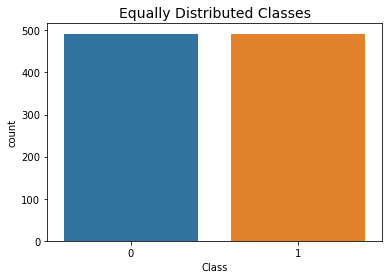

In [79]:
sns.countplot('Class', data=new_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

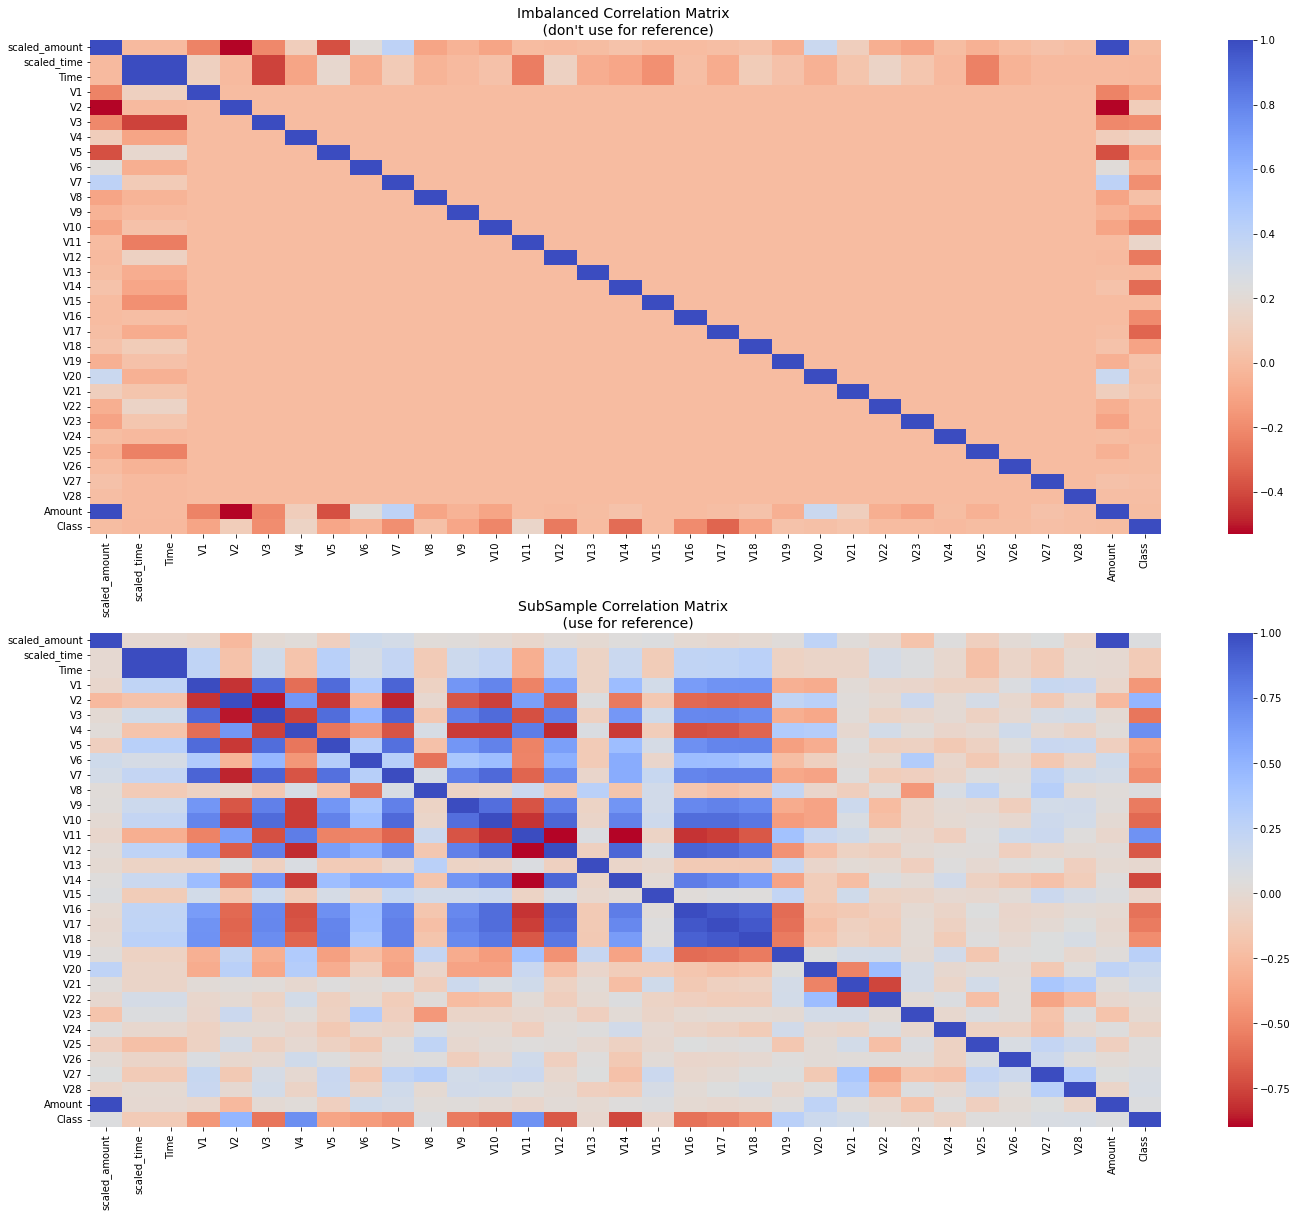

In [80]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

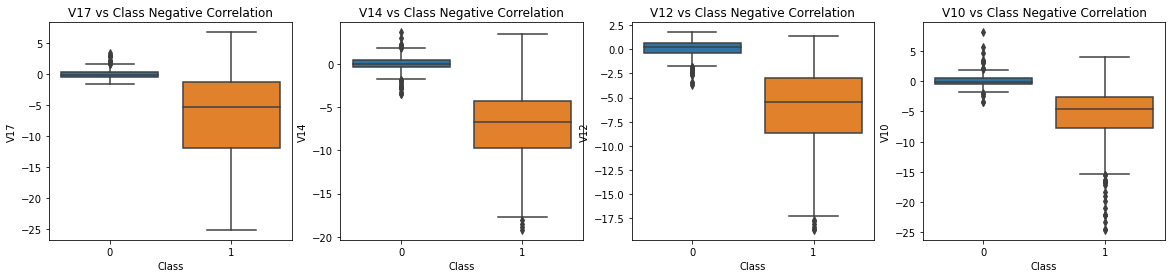

In [81]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_data, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_data, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_data, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_data, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()


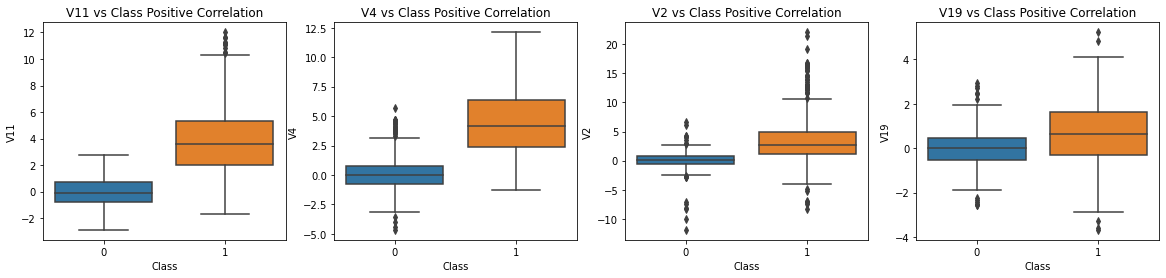

In [82]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_data, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_data, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_data, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_data, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [83]:
# Calculate the first and third quartiles (Q1 and Q3) for the 'V2' column
V2_Q1, V2_Q3 = np.percentile(new_data["V2"], 25), np.percentile(new_data["V2"], 75)

# Calculate the first and third quartiles (Q1 and Q3) for the 'V5' column
V5_Q1, V5_Q3 = np.percentile(new_data["V5"], 25), np.percentile(new_data["V5"], 75)

# Calculate the first and third quartiles (Q1 and Q3) for the 'V3' column
V3_Q1, V3_Q3 = np.percentile(new_data["V3"], 25), np.percentile(new_data["V3"], 75)

# Calculate the interquartile range (IQR) for the 'V2' column
IQR_V2 = V2_Q3 - V2_Q1

# Calculate the lower and upper bounds for outlier detection in the 'V2' column
V2_lower = V2_Q1 - (IQR_V2 * 1.5)
V2_upper = V2_Q3 + (IQR_V2 * 1.5)

# Replace outliers in the 'V2' column with the median value
new_data["V2"] = np.where(
    (new_data["V2"] > V2_upper) | (new_data["V2"] < V2_lower),
    np.median(new_data["V2"]),
    new_data["V2"]
)

# Calculate the interquartile range (IQR) for the 'V5' column
IQR_V5 = V5_Q3 - V5_Q1

# Calculate the lower bound for outlier detection in the 'V5' column
V5_lower = V5_Q1 - (IQR_V5 * 1.5)

# Replace outliers in the 'V5' column with the median value
new_data["V5"] = np.where(
    new_data["V5"] < V5_lower,
    np.median(new_data["V5"]),
    new_data["V5"]
)

# Calculate the interquartile range (IQR) for the 'V3' column
IQR_V3 = V3_Q3 - V3_Q1

# Calculate the lower bound for outlier detection in the 'V3' column
V3_lower = V3_Q1 - (IQR_V3 * 1.5)

# Replace outliers in the 'V3' column with the median value
new_data["V3"] = np.where(
    new_data["V3"] < V3_lower,
    np.median(new_data["V3"]),
    new_data["V3"]
)


In [84]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [85]:
random_for = RandomForestClassifier(n_estimators=100)

In [86]:
random_for.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
training_score = cross_val_score(random_for, X_train, y_train, cv=5)
score = training_score.mean()
score

0.9441264210271708

In [88]:
scorer = make_scorer(recall_score, average='macro')
kf = KFold(n_splits=5)
scores = cross_val_score(random_for, X, y, cv=kf, scoring=scorer)
recall_score_mean = scores.mean()
recall_score_mean

0.9458160690607